# 随机森林算法
## 算法介绍：
- 随机森林： 是一种基于集成学习的机器学习算法，核心思想：**三个臭皮匠顶一个诸葛亮**

## 核心思想：Bagging + 随机性
Bagging：
- Bootstrap Aggregating的缩写，中文称为自助聚合法
- Bootstrap: 从原始训练数据中**有放回**地随机抽取样本，生成多个不同的子训练集。这意味着同一个样本可能在一个子集中多次出现，而另一个样本可能一次都出现不了。
- Aggregating:用每个子训练集独立训练一棵决策树，最后将所有树的结果聚合起来（通过投票或者平均）作为最终的预测结果。

## 算法流程：

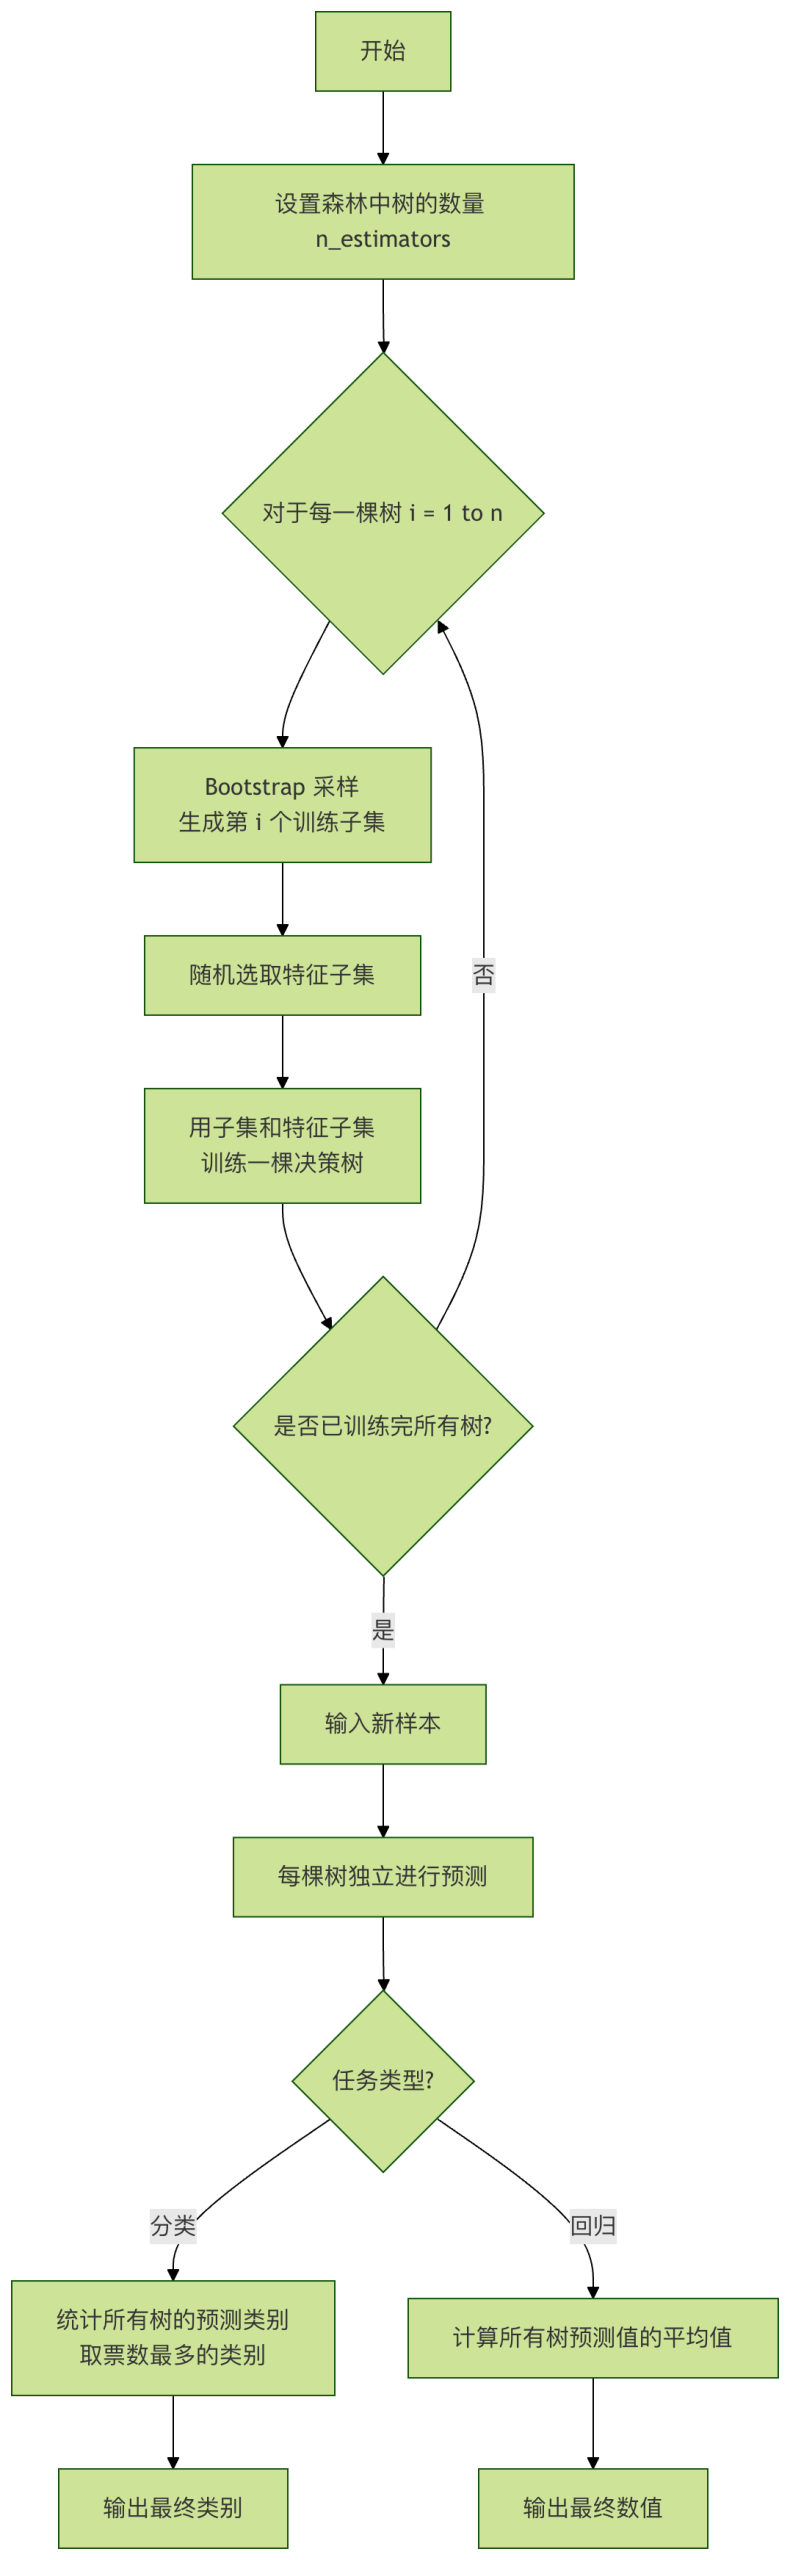
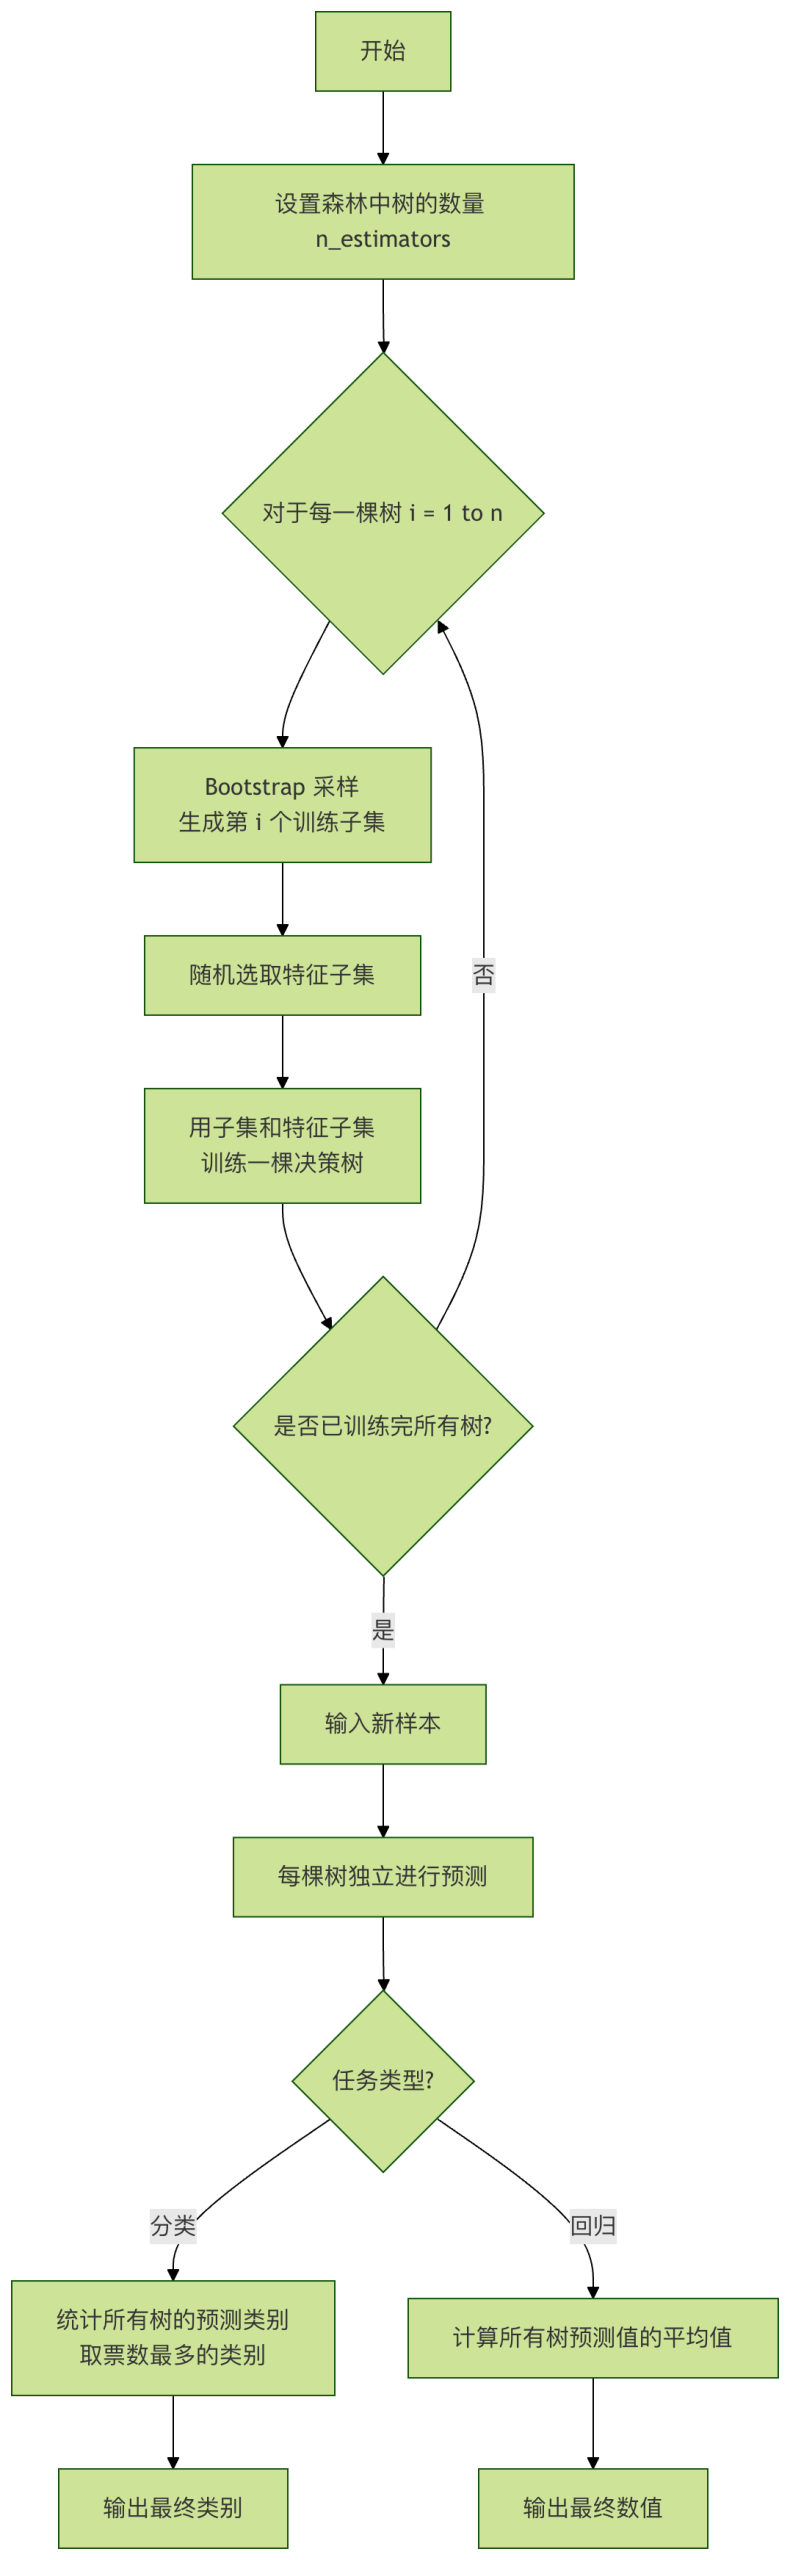

In [1]:
# 导入必要库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 创建随机森林分类器
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 参数说明：

参数名	|含义	|典型值/影响	|通俗解释
---|---|---|---
n_estimators	|森林中决策树的数量。	|默认 100。值越大，模型通常越稳定，性能越好，但计算成本也越高。	|"委员会的人数"。人越多，决策通常越可靠，但开会时间也更长。
max_depth	|单棵决策树的最大深度。	|默认 None（不限制）。限制深度可以防止过拟合，使模型更简单。	"限制每个人的发言时间"。|防止某个专家（树）钻牛角尖，过度关注训练数据的细节。
max_features	|寻找最佳分裂时考虑的特征数。	|可以是整数、浮点数或 'auto'/'sqrt'。这是引入"特征随机性"的关键参数。	|"每次讨论只随机看几个方面"。确保每棵树从不同角度分析问题，增加多样性。
min_samples_split	|节点分裂所需的最小样本数。	|默认 2。值越大，树生长越保守，越不容易过拟合。	|"一个小组至少要有几个人才能继续分组讨论"。避免因为一两个样本就创建一个新规则。
min_samples_leaf	|叶节点所需的最小样本数。	|默认 1。值越大，模型越平滑。	|"最终结论至少需要基于几个案例"。确保每个结论都有一定的数据支撑。
bootstrap	|是否使用 Bootstrap 采样。	|默认 True。如果设为 False，则将使用整个数据集训练每棵树，但会失去一部分随机性。	|"是否允许一个人重复发言"。开启就是 Bagging 的精髓。

In [7]:
# 模型训练
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# 模型预测
y_pred = rf_clf.predict(X_test)

In [9]:
# 模型评估
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

